In [239]:
import itertools

import pandas as pd
import numpy as np
import pandas_datareader as web
from pandas_datareader import data
import yfinance as yf
from yahoofinancials import YahooFinancials
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from datetime import date, timedelta
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats
import statsmodels.api as sm
from itertools import product
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from itertools import product
warnings.filterwarnings('ignore')
from sklearn.preprocessing import  OrdinalEncoder, StandardScaler
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import numpy as np
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

getting the datast from real time at yahoofinance

In [240]:
end_date = date.today()


data_set = yf.download(tickers='BTC-USD', start = '2017-01-01', end = end_date)
df = pd.DataFrame(data_set)


[*********************100%***********************]  1 of 1 completed


In [241]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984
2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008
...,...,...,...,...,...,...
2022-12-02,16968.683594,17088.660156,16877.880859,17088.660156,17088.660156,19539705127
2022-12-03,17090.097656,17116.041016,16888.140625,16908.236328,16908.236328,16217776704
2022-12-04,16908.169922,17157.767578,16903.439453,17130.486328,17130.486328,16824520830


In [242]:
#df.to_csv('Bitcoin.csv')

In [243]:
# dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
#btc_df = pd.read_csv('Bitcoin.csv', parse_dates=['Date'], date_parser=dateparse)


MONTHLY FORECAST

In [244]:
df = df.resample('M').mean()
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-31,914.680971,937.449585,887.202387,914.916159,914.916159,1.659346e+08
2017-02-28,1055.620071,1073.503898,1040.417923,1062.533672,1062.533672,1.529558e+08
2017-03-31,1133.212576,1161.893269,1099.865671,1129.365228,1129.365228,3.507244e+08
2017-04-30,1197.646997,1216.302983,1188.384998,1206.641007,1206.641007,3.252483e+08
2017-05-31,1865.748712,1968.786783,1812.038078,1895.383529,1895.383529,1.105221e+09
...,...,...,...,...,...,...
2022-08-31,22471.866557,22870.607863,22075.572203,22366.266318,22366.266318,2.884492e+10
2022-09-30,19821.353711,20199.349349,19367.072591,19804.779232,19804.779232,3.744241e+10
2022-10-31,19616.090285,19870.064264,19380.976058,19650.525643,19650.525643,3.090011e+10


seasonality check

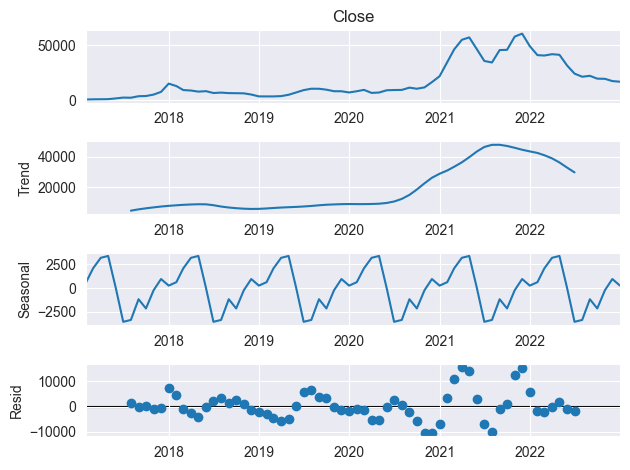

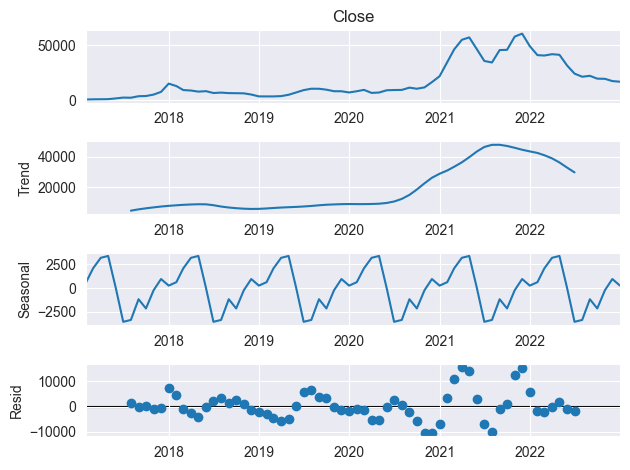

In [245]:
seasonal_decompose(df.Close).plot()

In [246]:
print("Dickey–Fuller test: p=%f" % adfuller(df.Close)[1])


Dickey–Fuller test: p=0.457573


This indicates that the data is stationary as the p-value is lower than 0.05

In [247]:
#Box-cox transformation
df['close_box'], lmbda = stats.boxcox(df.Close)
print("Dickey–Fuller test: p=%f" % adfuller(df.close_box)[1])

Dickey–Fuller test: p=0.208483


This indicates that the data is stationary as the p-value is higher than 0.05

Seasonal differentiation

In [248]:
#seasonal differentiation 12months
df['box_diff_seasonal_12'] = df.close_box - df.close_box.shift(12)
print("Dickey–Fuller test: p=%f" % adfuller(df.box_diff_seasonal_12[12:])[1])

Dickey–Fuller test: p=0.224168


This indicates that the data is stationary as the p-value is higher than 0.05

In [249]:
#seasonal differentiation 12months
df['box_diff_seasonal_3'] = df.close_box - df.close_box.shift(3)
print("Dickey–Fuller test: p=%f" % adfuller(df.box_diff_seasonal_3[3:])[1])

Dickey–Fuller test: p=0.064963


his indicates that the data is stationary as the p-value is higher than 0.05

plotting auto correlation

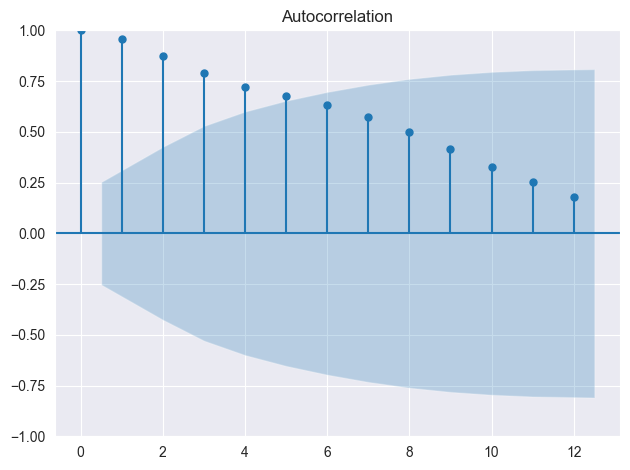

In [250]:
plot_acf(df.Close[12:].values.squeeze(), lags=12)

plt.tight_layout()
plt.show()

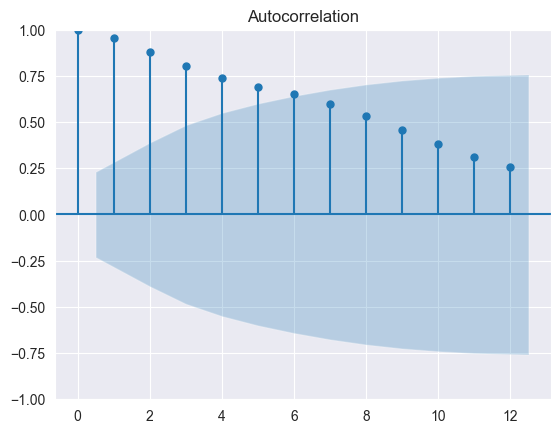

In [251]:
plot_acf(df.Close, ax=plt.gca(), lags=12)
plt.show()

determine the best parameter

In [252]:
# p = d = q = range(0,2)
#
# #generating different combinations
# pdq = list(itertools.product(p,d,q))
# pdq_season = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]
#
# print('Examples of parameter combinations for Seasonal ARIMA: ')
# print('SARIMAX: {} x {}'.format(pdq[1], pdq_season[1]))
# print('SARIMAX: {} x {}'.format(pdq[1], pdq_season[2]))
# print('SARIMAX: {} x {}'.format(pdq[2], pdq_season[3]))
# print('SARIMAX: {} x {}'.format(pdq[2], pdq_season[4]))

In [253]:
Qs = range(0,2)
qs = range(0,3)
ps = range(0,3)
Ps = range(0,3)
D=1
d=1

parameters = product(ps, Ps, qs, Qs)
para_list = list(parameters)
len(para_list)

54

In [254]:
#model selection, checking for wrong parameters
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in para_list:
    try:
        model = sm.tsa.statespace.SARIMAX(df.Close, order=(param[0], d, param[1]), seasonal_order= (param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model =  model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])


In [257]:
#model selection, checking for best parameters
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters          aic
37  (2, 0, 0, 1)  1160.364753
39  (2, 0, 1, 1)  1162.318732
38  (2, 0, 1, 0)  1162.476095
14  (0, 2, 1, 0)  1163.535729
15  (0, 2, 1, 1)  1163.552824
                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                   72
Model:             SARIMAX(2, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -576.182
Date:                              Thu, 08 Dec 2022   AIC                           1160.365
Time:                                      00:19:23   BIC                           1168.675
Sample:                                  01-31-2017   HQIC                          1163.609
                                       - 12-31-2022                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.97